In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [166]:
invoice_data = pd.read_csv('invoice_data_clean.csv')
invoice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492314 entries, 0 to 492313
Data columns (total 28 columns):
Unnamed: 0             492314 non-null int64
Unnamed: 0.1           492314 non-null int64
Cust Type              492314 non-null object
Customer No.           492314 non-null object
Gate Pass Time         492314 non-null object
Invoice No             492314 non-null int64
Job Card No            492314 non-null int64
KMs Reading            492314 non-null int64
Labour Total           492314 non-null float64
Make                   492314 non-null object
Misc Total             492314 non-null float64
Model                  490789 non-null object
OSL Total              492314 non-null float64
Order Type             492314 non-null object
Parts Total            492314 non-null float64
Pin code               492314 non-null int64
Plant                  492314 non-null object
Plant Name1            492314 non-null object
Print Status           492314 non-null object
Recovrbl Exp     

In [168]:
df = invoice_data['Clean_District'].value_counts().head(13)
df2 = invoice_data['Data Origin'].value_counts().head(7)
df2.index
df1 = ['Maharashtra', 'Tamil Nadu', 'Karnataka', 'Telangana', 'Uttar Pradesh',
       'Gujarat', 'Punjab', 'Andhra Pradesh', 'Haryana', 'Madhya Pradesh',
       'Rajasthan', 'Kerala', 'Delhi']
# df1,type(df1),(df/len(invoice_data)*100).sum()

KeyError: 'Data Origin'

In [97]:
df2 = invoice_data
df2 = df2[df2.Clean_District.isin(df1)]
ser = ['MARUTI SUZUKI', 'MAHINDRA &  MAHINDRA', 'HYUNDAI', 'TATA MOTORS',
       'GENERAL MOTORS', 'FORD', 'TOYOTA', 'HONDA']
df2 = df2[df2['Make'].isin(ser)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403304 entries, 0 to 492313
Data columns (total 28 columns):
Unnamed: 0             403304 non-null int64
Unnamed: 0.1           403304 non-null int64
Cust Type              403304 non-null object
Customer No.           403304 non-null object
Gate Pass Time         403304 non-null object
Invoice No             403304 non-null int64
Job Card No            403304 non-null int64
KMs Reading            403304 non-null int64
Labour Total           403304 non-null float64
Make                   403304 non-null object
Misc Total             403304 non-null float64
Model                  401976 non-null object
OSL Total              403304 non-null float64
Order Type             403304 non-null object
Parts Total            403304 non-null float64
Pin code               403304 non-null int64
Plant                  403304 non-null object
Plant Name1            403304 non-null object
Print Status           403304 non-null object
Recovrbl Exp     

In [174]:
len(df2)/len(inv_cust)*100

69.75678025317279

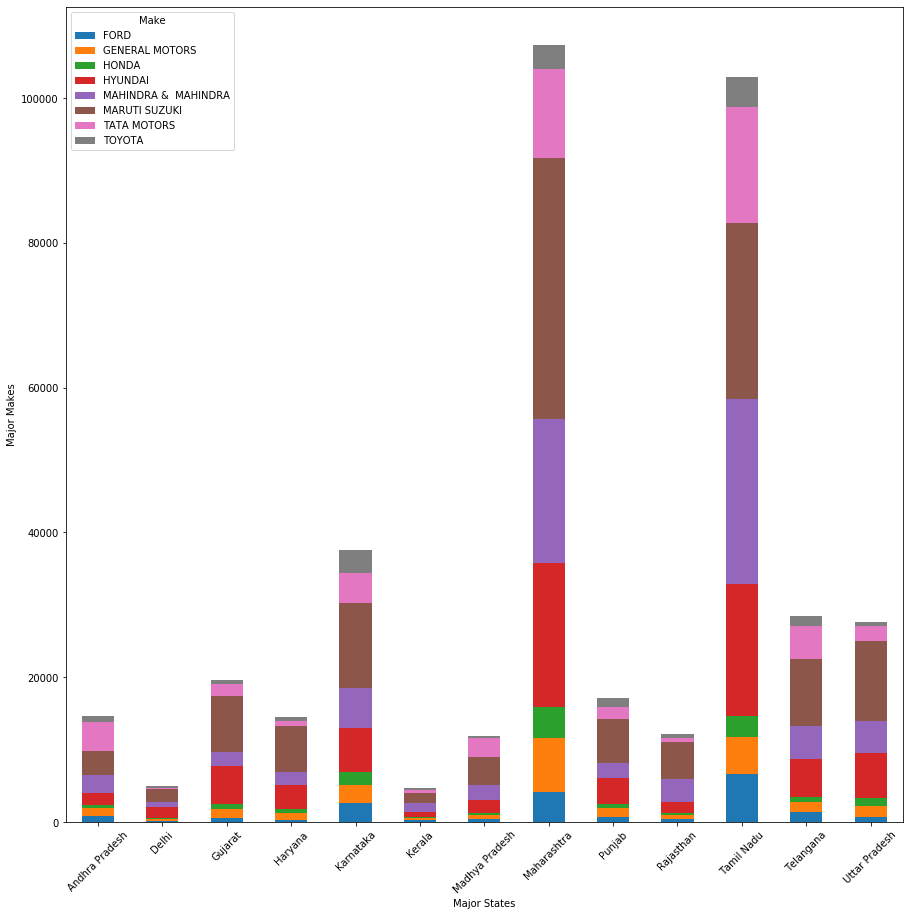

In [99]:
B= df2.groupby(['Clean_District','Make']).size().unstack()

B.plot(kind='bar', stacked=True, figsize=(15,15))
plt.xlabel('Major States')
plt.ylabel('Major Makes')
plt.xticks(rotation = 45)
plt.show()

Make,FORD,GENERAL MOTORS,HONDA,HYUNDAI,MAHINDRA & MAHINDRA,MARUTI SUZUKI,TATA MOTORS,TOYOTA
Clean_District,,,,,,,,
Andhra Pradesh,5.445816,8.093278,2.139918,11.824417,17.112483,23.086420,26.947874,5.349794
Delhi,2.152918,5.855131,4.527163,28.651911,14.325956,35.231388,5.150905,4.104628
Gujarat,2.720326,6.332145,3.820683,26.688742,9.434539,39.628120,8.487010,2.888436
Haryana,2.365680,6.159045,3.545072,23.629216,11.807711,43.603007,5.441755,3.448514
Karnataka,6.904083,6.736276,4.701276,16.317290,14.838985,31.052393,11.133900,8.315798
Kerala,6.224942,6.372652,3.460646,13.336147,27.073222,29.520996,6.414855,7.596539
Madhya Pradesh,3.475130,4.572098,2.721487,14.830012,17.367275,32.682968,21.227600,3.123430
Maharashtra,3.814709,6.999226,3.967595,18.549628,18.542170,33.628541,11.447855,3.050275
Punjab,4.031362,7.237727,3.106898,20.841379,12.415891,35.550875,9.753672,7.062196


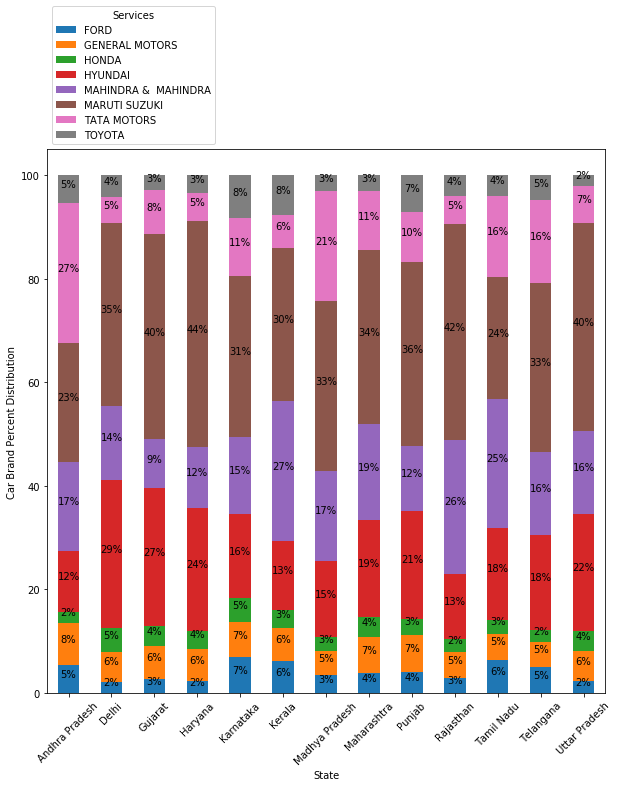

In [100]:
ax= pd.crosstab(df2['Clean_District'], df2['Make']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)
display(ax)
plt.legend(loc='lower left', bbox_to_anchor=(0.0, 1.0), title="Services")

plt.xlabel('State')
plt.ylabel('Car Brand Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.xticks(rotation=45)
plt.show()

In [101]:
jtd = pd.read_csv('jtd_data_clean.csv')
jtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5619484 entries, 0 to 5619483
Data columns (total 9 columns):
Unnamed: 0             int64
DBM Order              int64
Order Item             int64
Material               object
Description            object
Item Category          object
Order Quantity         float64
Target quantity UoM    object
Net value              float64
dtypes: float64(2), int64(3), object(4)
memory usage: 385.9+ MB


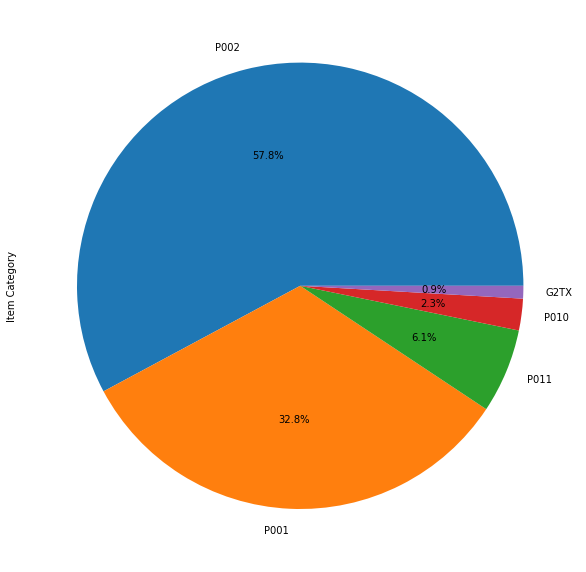

In [102]:
jtd['Item Category'].value_counts().plot(kind='pie',figsize=(10,15),autopct='%1.1f%%')

In [122]:
jtd.groupby('Item Category')[['Order Quantity']].sum()

,Order Quantity
Item Category,
G2TX,1.000000e+00
P001,2.913867e+08
P002,6.799416e+06
P010,1.314851e+05
P011,4.781021e+05


In [123]:
jtd.groupby('Item Category')[['Order Quantity']].median()

,Order Quantity
Item Category,
G2TX,0.0
P001,30.0
P002,1.0
P010,1.0
P011,1.0


In [124]:
int(2.913867e+08)

291386700

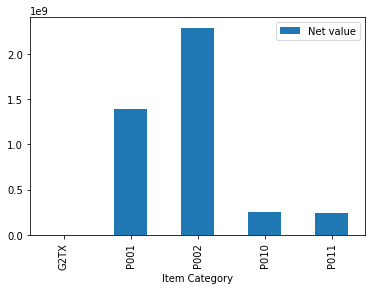

In [131]:
jtd.groupby('Item Category')[['Net value']].sum().plot(kind = 'bar')

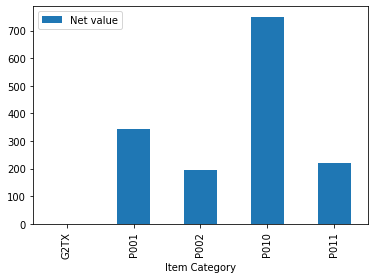

In [128]:
jtd.groupby('Item Category')[['Net value']].median().plot(kind = 'bar')

In [135]:
jtd.head()

,Unnamed: 0,DBM Order,Order Item,Material,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,0,22385,180,OSLCC_SRV31,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,1,23910,10,1DM279018170117,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,2,23910,40,1IS150203BE01,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,3,23910,60,1DM279001990173,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,4,23910,70,1DM88552790S001SA,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63


In [169]:
inv_cust = pd.read_csv('invoice-customer_clean.csv')
inv_cust.info()

C:\Users\admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492312 entries, 0 to 492311
Data columns (total 30 columns):
Unnamed: 0             492312 non-null int64
Cust Type              492312 non-null object
Customer No.           492312 non-null object
Gate Pass Time         492312 non-null object
Invoice No             492312 non-null int64
Job Card No            492312 non-null int64
KMs Reading            492312 non-null int64
Labour Total           492312 non-null float64
Make                   492312 non-null object
Misc Total             492312 non-null float64
Model                  492312 non-null object
OSL Total              492312 non-null float64
Order Type             492312 non-null object
Parts Total            492312 non-null float64
Pin code               492312 non-null int64
Plant                  492312 non-null object
Plant Name1            492312 non-null object
Print Status           492312 non-null object
Recovrbl Exp           492312 non-null float64
Total Amt Wtd T

In [190]:
df = inv_cust['Clean_District'].value_counts().head(13)
# ser = inv_cust['Data Origin'].value_counts().head(7)
# df2.index
df1 = ['Maharashtra', 'Tamil Nadu', 'Karnataka', 'Telangana', 'Uttar Pradesh',
       'Gujarat', 'Punjab', 'Andhra Pradesh', 'Haryana', 'Madhya Pradesh',
       'Rajasthan', 'Kerala', 'Delhi']
ser = ['Z005', 'Z001', 'Z006', 'Z002', 'Z021', 'Z019', 'Z004']
df2 = inv_cust
df2 = df2[df2.Clean_District.isin(df1)]
df2 = df2[df2['Data Origin'].isin(ser)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343421 entries, 5 to 492311
Data columns (total 31 columns):
Unnamed: 0             343421 non-null int64
Cust Type              343421 non-null object
Customer No.           343421 non-null object
Gate Pass Time         343421 non-null object
Invoice No             343421 non-null int64
Job Card No            343421 non-null int64
KMs Reading            343421 non-null int64
Labour Total           343421 non-null float64
Make                   343421 non-null object
Misc Total             343421 non-null float64
Model                  343421 non-null object
OSL Total              343421 non-null float64
Order Type             343421 non-null object
Parts Total            343421 non-null float64
Pin code               343421 non-null int64
Plant                  343421 non-null object
Plant Name1            343421 non-null object
Print Status           343421 non-null object
Recovrbl Exp           343421 non-null float64
Total Amt Wtd T

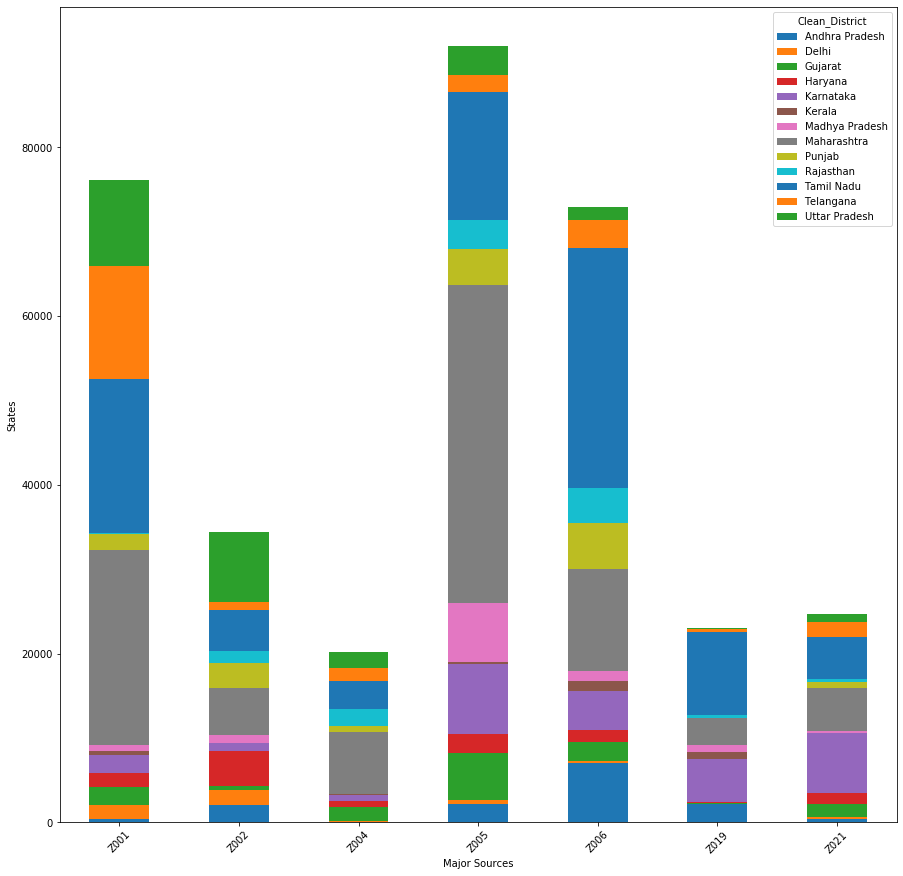

In [193]:
B= df2.groupby(['Data Origin','Clean_District']).size().unstack()

B.plot(kind='bar', stacked=True, figsize=(15,15))
plt.xlabel('Major Sources')
plt.ylabel('States')
plt.xticks(rotation = 45)
plt.show()

Clean_District,Andhra Pradesh,Delhi,Gujarat,Haryana,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Punjab,Rajasthan,Tamil Nadu,Telangana,Uttar Pradesh
Data Origin,,,,,,,,,,,,,
Z001,0.492553,2.253921,2.781937,2.163291,2.859432,0.619960,0.945701,30.305777,2.461450,0.219350,23.896025,17.574277,13.426327
Z002,6.159031,4.918509,1.493274,12.158275,2.515906,0.194649,2.661166,16.353389,8.300166,4.232881,14.151245,2.757038,24.104471
Z004,0.099020,1.029805,8.154273,3.069611,3.960788,0.084167,0.500050,36.310526,3.138925,10.030696,16.798693,7.248242,9.575205
Z005,2.317571,0.519362,6.163892,2.449042,8.958451,0.302056,7.505759,40.936155,4.714460,3.699639,16.520709,2.111130,3.801773
Z006,9.607795,0.420709,3.057337,1.847284,6.481938,1.584169,1.597873,16.487146,7.598805,5.706298,38.825851,4.666173,2.118621
Z019,9.480322,0.073929,0.674060,0.352250,21.935203,3.661666,3.813873,13.733420,0.304414,1.248097,42.639704,1.591650,0.491411
Z021,1.800122,0.904115,6.057166,5.603081,28.570849,0.145956,0.721670,21.025745,2.501520,1.390635,20.198662,7.293736,3.786742


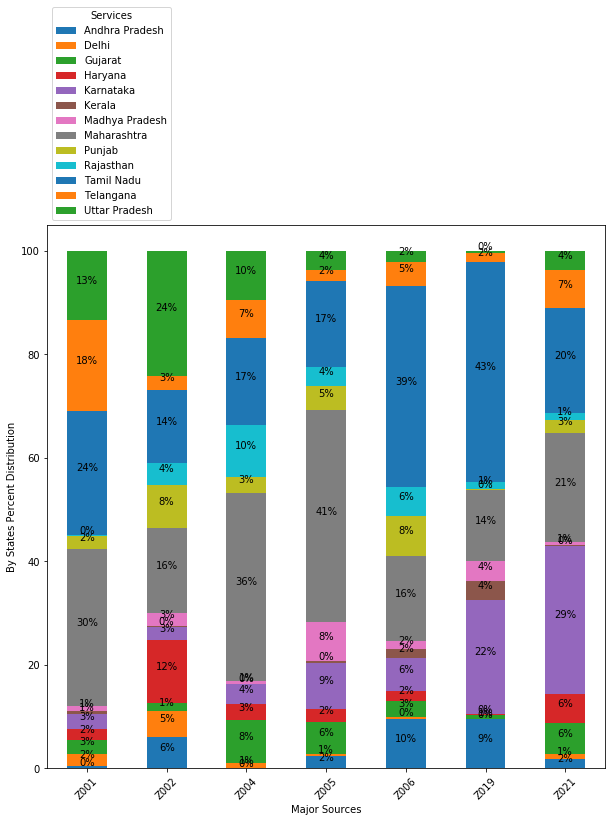

In [194]:
ax= pd.crosstab(df2['Data Origin'], df2['Clean_District']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)
display(ax)
plt.legend(loc='lower left', bbox_to_anchor=(0.0, 1.0), title="Services")

plt.xlabel('Major Sources')
plt.ylabel('By States Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.xticks(rotation=45)
plt.show()

In [180]:
inv_cust['year'] = pd.to_datetime(inv_cust['JobCard_DateTime']).dt.year

In [176]:
invoice_data = inv_cust

In [139]:
Q1 = invoice_data['Total Amt Wtd Tax.'][invoice_data['Total Amt Wtd Tax.']>=0].quantile(0.25)
Q3 = invoice_data['Total Amt Wtd Tax.'][invoice_data['Total Amt Wtd Tax.']>=0].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
outliers = invoice_data['Total Amt Wtd Tax.'][invoice_data['Total Amt Wtd Tax.']>=0][~((invoice_data['Total Amt Wtd Tax.']<(Q1 - 1.5 * IQR))|(invoice_data['Total Amt Wtd Tax.']> (Q3 + 1.5 * IQR)))]
print(outliers.shape)
print(invoice_data.shape[0]-outliers.shape[0])

4110.95
(444900,)
47412


In [143]:
df = invoice_data['Data Origin'].value_counts().head(7)
# df.index
df1 = ['Z005', 'Z001', 'Z006', 'Z002', 'Z021', 'Z019', 'Z004']
invoice_data = invoice_data[invoice_data['Data Origin'].isin(df1)]

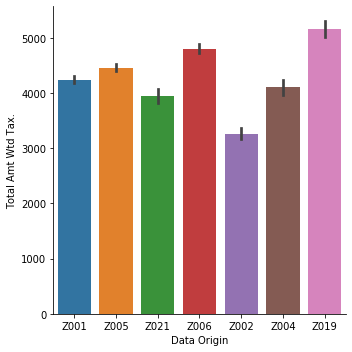

In [145]:
sns.catplot(x="Data Origin", y="Total Amt Wtd Tax.", kind="bar", data=invoice_data)

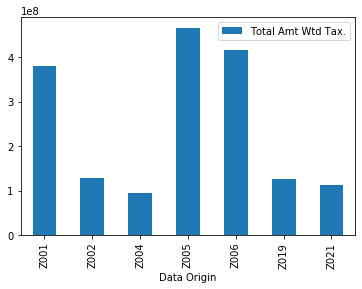

In [157]:
invoice_data.groupby('Data Origin')[['Total Amt Wtd Tax.']].sum().plot(kind = 'bar')

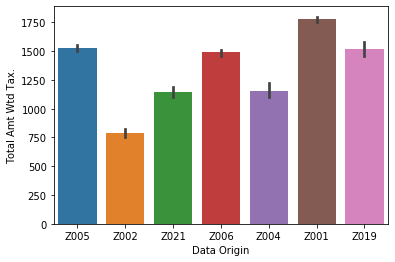

In [161]:
from numpy import median
invoice_data = invoice_data.sort_values('Total Amt Wtd Tax.')
sns.barplot(x="Data Origin", y="Total Amt Wtd Tax.",data=invoice_data, estimator = np.median)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

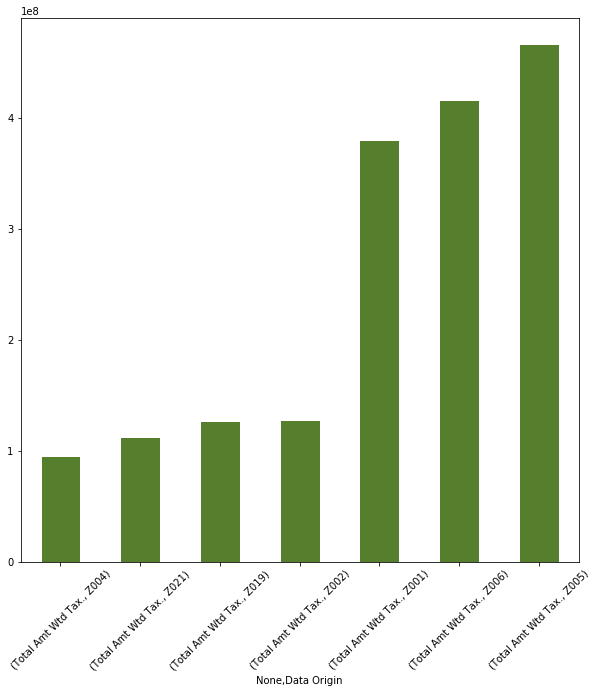

In [163]:
fig = pd.DataFrame(invoice_data.groupby('Data Origin')['Total Amt Wtd Tax.'].sum().sort_values()).unstack()
figure_2 = fig.plot(kind='bar',stacked=True,figsize=(10,10),color='#557f2d',label='Sum',edgecolor='white')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

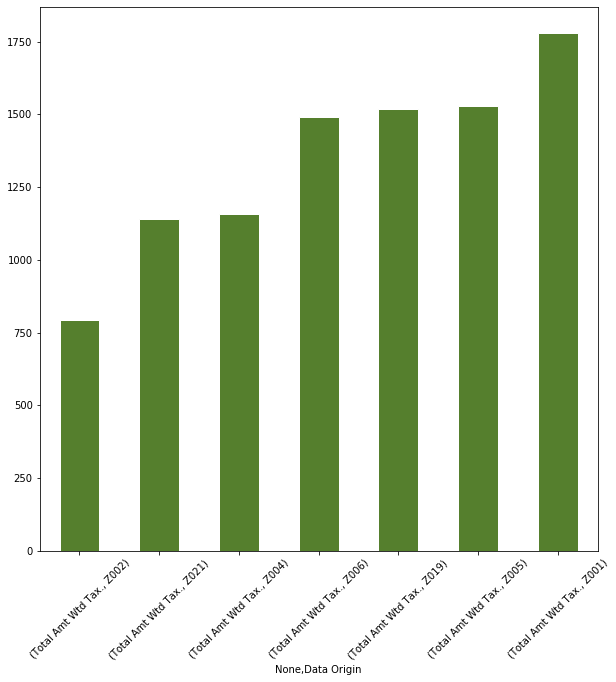

In [165]:
fig = pd.DataFrame(invoice_data.groupby('Data Origin')['Total Amt Wtd Tax.'].median().sort_values()).unstack()
figure_2 = fig.plot(kind='bar',stacked=True,figsize=(10,10),color='#557f2d',label='Sum',edgecolor='white')
plt.xticks(rotation = 45)

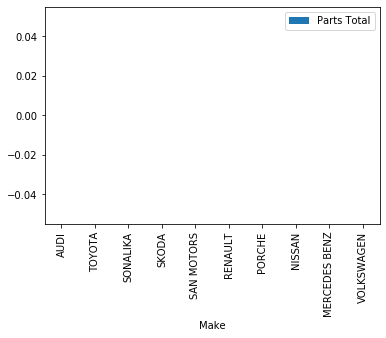

In [200]:
A = pd.DataFrame(invoice_data.groupby("Make")["Parts Total"].median().sort_values(ascending=True))
A[:10].plot(kind='bar')

In [203]:
invoice_data.groupby('Make')[['Parts Total']].median().sort_values('Parts Total')

,Parts Total
Make,
AUDI,0.000
TOYOTA,0.000
SONALIKA,0.000
SKODA,0.000
SAN MOTORS,0.000
RENAULT,0.000
PORCHE,0.000
NISSAN,0.000
MERCEDES BENZ,0.000


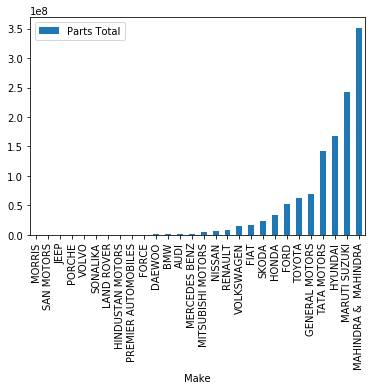

In [205]:
invoice_data.groupby('Make')[['Parts Total']].sum().sort_values('Parts Total').plot(kind = 'bar')

In [208]:
invoice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492312 entries, 0 to 492311
Data columns (total 31 columns):
Unnamed: 0             492312 non-null int64
Cust Type              492312 non-null object
Customer No.           492312 non-null object
Gate Pass Time         492312 non-null object
Invoice No             492312 non-null int64
Job Card No            492312 non-null int64
KMs Reading            492312 non-null int64
Labour Total           492312 non-null float64
Make                   492312 non-null object
Misc Total             492312 non-null float64
Model                  492312 non-null object
OSL Total              492312 non-null float64
Order Type             492312 non-null object
Parts Total            492312 non-null float64
Pin code               492312 non-null int64
Plant                  492312 non-null object
Plant Name1            492312 non-null object
Print Status           492312 non-null object
Recovrbl Exp           492312 non-null float64
Total Amt Wtd T

Text(0.5, 1.0, 'Make Trends')

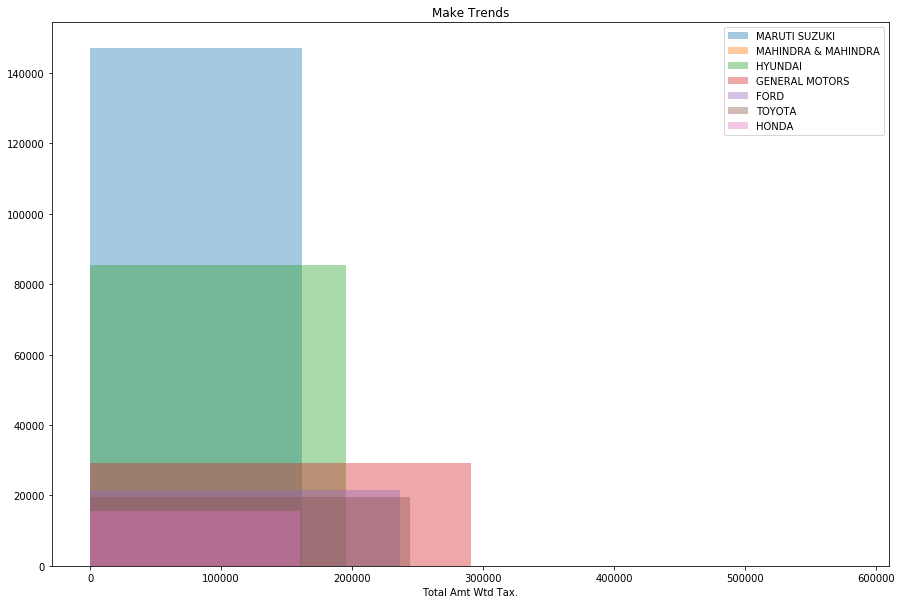

In [213]:

fig, axes = plt.subplots(figsize=(15, 10))

ax = sns.distplot(invoice_data[invoice_data['Make']=="MARUTI SUZUKI"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "MARUTI SUZUKI", ax = axes, kde =False)
ax = sns.distplot(invoice_data[invoice_data['Make']=="MAHINDRA & MAHINDRA"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "MAHINDRA & MAHINDRA", ax = axes, kde =False)
ax = sns.distplot(invoice_data[invoice_data['Make']=="HYUNDAI"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "HYUNDAI", ax = axes, kde =False)
ax = sns.distplot(invoice_data[invoice_data['Make']=="GENERAL MOTORS"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "GENERAL MOTORS", ax = axes, kde =False)
ax = sns.distplot(invoice_data[invoice_data['Make']=="FORD"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "FORD", ax = axes, kde =False)
ax = sns.distplot(invoice_data[invoice_data['Make']=="TOYOTA"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "TOYOTA", ax = axes, kde =False)
ax = sns.distplot(invoice_data[invoice_data['Make']=="HONDA"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "HONDA", ax = axes, kde =False)
# ax = sns.distplot(invoice_data[invoice_data['Make']=="WBW Order"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "WBW Order", ax = axes, kde =False)
ax.legend()
ax.set_title('Make Trends')

Text(0.5, 1.0, 'Order Type Trends')

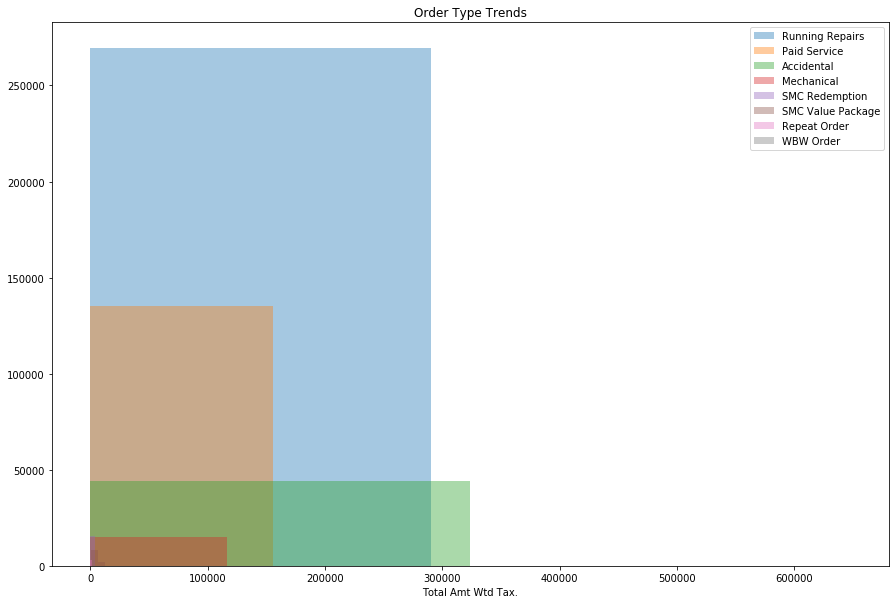

In [214]:
invoice_customer_plant_jtd = invoice_data
fig, axes = plt.subplots(figsize=(15, 10))

ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="Running Repairs"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Running Repairs", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="Paid Service"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Paid Service", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="Accidental"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Accidental", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="Mechanical"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Mechanical", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="SMC Redemption"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "SMC Redemption", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="SMC Value Package"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "SMC Value Package", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="Repeat Order"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Repeat Order", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd['Order Type']=="WBW Order"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "WBW Order", ax = axes, kde =False)
ax.legend()
ax.set_title('Order Type Trends')

Text(0.5, 1.0, 'Geo locaton based Revenue Analysis')

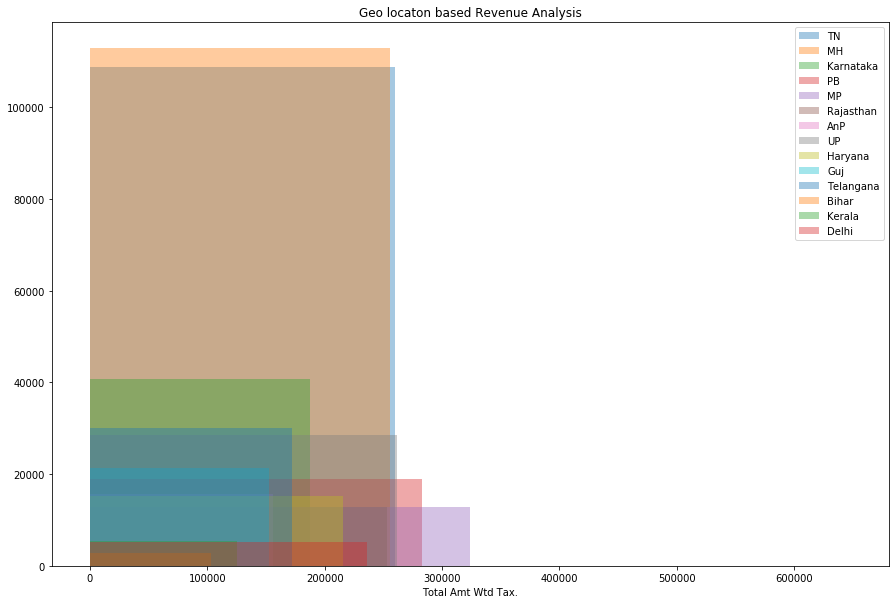

In [218]:
invoice_customer_plant_jtd['State'] = invoice_customer_plant_jtd['Clean_District']
fig, axes = plt.subplots(figsize=(15, 10))

ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Tamil Nadu"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "TN", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Maharashtra"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "MH", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Karnataka"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Karnataka", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Punjab"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "PB", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Madhya Pradesh"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "MP", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Rajasthan"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Rajasthan", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Andhra Pradesh"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "AnP", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Uttar Pradesh"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "UP", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Haryana"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Haryana", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Gujarat"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Guj", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Telangana"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Telangana", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Bihar"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Bihar", ax = axes, kde =False)
# ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Himachal Pradesh"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "HP", ax = axes, kde =False)
# ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Chandigarh"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "CHGRH", ax = axes, kde =False)
# ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Uttarakhand"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "UK", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Kerala"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Kerala", ax = axes, kde =False)
# ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Odisha"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Odisha", ax = axes, kde =False)
# ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Puducherry"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Punducherry", ax = axes, kde =False)
# ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="West Bengal"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "WB", ax = axes, kde =False)
# ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Chhattisgarh"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Chattisgarh", ax = axes, kde =False)
ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Delhi"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Delhi", ax = axes, kde =False)
# ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Jharkhand"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Jharkhand", ax = axes, kde =False)
# ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Assam"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Assam", ax = axes, kde =False)
# ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Dadra and Nagar Hav."]["Total Amt Wtd Tax."].dropna(), bins=2, label = "D&NH", ax = axes, kde =False)
# ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Arunachal Pradesh"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "ArP", ax = axes, kde =False)
# ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Jammu and Kashmir"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "J&K", ax = axes, kde =False)
# ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Goa"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Goa", ax = axes, kde =False)
# ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Andaman and Nico.In."]["Total Amt Wtd Tax."].dropna(), bins=2, label = "A&N", ax = axes, kde =False)
# ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Sikkim"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Sikkim", ax = axes, kde =False)
# ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Nagaland"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Nagaland", ax = axes, kde =False)
# ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Tripura"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Tripura", ax = axes, kde =False)
# ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Megalaya"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Megalaya", ax = axes, kde =False)
# ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Manipur"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Manipur", ax = axes, kde =False)
# ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Lakshadweep"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Lakshadeep", ax = axes, kde =False)
# ax = sns.distplot(invoice_customer_plant_jtd[invoice_customer_plant_jtd["State"]=="Mizoram"]["Total Amt Wtd Tax."].dropna(), bins=2, label = "Mizoram", ax = axes, kde =False)

ax.legend()
ax.set_title('Geo locaton based Revenue Analysis')